In [1]:
from pandas import read_csv

pcs = read_csv('plink.eigenvec', sep='\s+', names=['_', 'ID'] + [f'PC_{i}' for i in range(1, 101)]).iloc[:, 2:].values
pcs.shape

(2504, 100)

In [2]:
from sklearn.metrics import euclidean_distances
import numpy as np
from tqdm.auto import tqdm

def pairwise_euc(X):
    chunks=np.array_split(np.arange(X.shape[1]), 30)
    dists=[]
    for chunk_index in tqdm(chunks):
        chunk = X[:, chunk_index]
        dists.append(euclidean_distances(chunk, squared=True))
    return np.sqrt(sum(dists))

In [3]:
mine = pairwise_euc(pcs)

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
from phate import PHATE

model = PHATE(knn_dist='precomputed', n_landmark=None)
X_ph = model.fit_transform(mine)

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 2504 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.63 seconds.
  Calculated graph and diffusion operator in 0.82 seconds.
  Calculating optimal t...


In [6]:
model.diff_op.shape

(2000, 2000)

/home/shussain/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

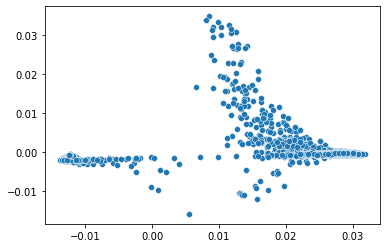

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(X_ph[:, 0], X_ph[:, 1])